# Comparing effect of MUC5B Mutation in Colon cancer on Transcriptomics and Proteomics

Investigate how transcript and proteomic levels are altered when MUC5B is mutated in Colon cancer for proteins who showed significant differences in Transcript expression

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

import cptac
import cptac.algorithms as al

co = cptac.Colon()

### Specify Mutation Gene

In [2]:
mutation_gene = 'MUC5B'

### Read in Trans Results and filter for Colon cancer and MUC5B Mutation

In [3]:
#Read in Results of Trans Analysis
Trans_Results = pd.read_csv("../Formatted_Trans_Results.csv")

#Filter for only Colon cancer, and only MUC5B Mutation
Colon = Trans_Results.loc[Trans_Results['Cancer_Type'] == 'Colon']
MUC5B_Colon = Colon.loc[Colon['Mutation_Gene'] == mutation_gene]

### Split proteomics and transcriptomics

In [4]:
MUC5B_Colon_Prot = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'proteomics']
MUC5B_Colon_Trans = MUC5B_Colon.loc[MUC5B_Colon['Omics'] == 'transcriptomics']

### Display proteomics

In [5]:
print(len(MUC5B_Colon_Prot))
MUC5B_Colon_Prot

38


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
617,Colon,MUC5B,PCK2,NaN,proteomics,True,1.136850e-05
618,Colon,MUC5B,MRE11,NaN,proteomics,False,1.144045e-10
619,Colon,MUC5B,GPX2,NaN,proteomics,False,5.988006e-10
620,Colon,MUC5B,ANP32E,NaN,proteomics,False,3.042503e-09
621,Colon,MUC5B,KRT20,NaN,proteomics,False,3.969811e-09
622,Colon,MUC5B,RAD50,NaN,proteomics,False,9.817991e-09
623,Colon,MUC5B,PRDX5,NaN,proteomics,False,5.077905e-08
624,Colon,MUC5B,ARHGEF2,NaN,proteomics,False,7.919124e-08
625,Colon,MUC5B,NFKB2,NaN,proteomics,False,1.471187e-07
626,Colon,MUC5B,MRPS31,NaN,proteomics,False,3.790579e-07


### Display transcriptomics

In [6]:
print(len(MUC5B_Colon_Trans))
MUC5B_Colon_Trans

82


,Cancer_Type,Mutation_Gene,Protein,Site,Omics,Interacting_Protein,P_Value
655,Colon,MUC5B,MUC20,NaN,transcriptomics,True,4.319530e-06
656,Colon,MUC5B,FRMD1,NaN,transcriptomics,True,1.340157e-05
657,Colon,MUC5B,ST6GAL1,NaN,transcriptomics,True,6.725471e-05
658,Colon,MUC5B,MUC12,NaN,transcriptomics,True,1.108167e-04
659,Colon,MUC5B,ST6GALNAC2,NaN,transcriptomics,True,6.152779e-04
661,Colon,MUC5B,GPX2,NaN,transcriptomics,False,1.758001e-10
662,Colon,MUC5B,POU5F1B,NaN,transcriptomics,False,4.688794e-10
663,Colon,MUC5B,RUBCNL,NaN,transcriptomics,False,1.541604e-09
664,Colon,MUC5B,ATP10B,NaN,transcriptomics,False,3.068562e-09
665,Colon,MUC5B,NUBPL,NaN,transcriptomics,False,3.884908e-09


<br><br>When MUC5B is mutated in colon cancer, 82 transcripts are significantly altered, yet only 38 proteomics <br><br>

### Generate lists of proteins significantly altered in proteomic expression and transcript expression when MUC5B mutated

In [7]:
prots_MUC5B_Colon = list(MUC5B_Colon_Prot['Protein'])
rna_MUC5B_Colon = list(MUC5B_Colon_Trans['Protein'])

### Make plot illustrating $Δ$ transcriptomics and  $Δ$ proteomics the above genes showing altered transcripts when MUC5B is mutated

### Compute $Δ$ proteomics for above proteins

In [8]:
delta_proteomics = {}

#Loop through proteins found in both lists
for prot in rna_MUC5B_Colon:
    #Use join omics to mutations to compare proteomic levels when mutation gene is mutated
    proteomic_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='proteomics',omics_genes=prot)
    
    #Use only Tumor samples
    proteomic_df = proteomic_df.loc[proteomic_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = proteomic_df.loc[proteomic_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean proteomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_proteomics'])
    wt_mean = np.mean(wt_df[prot + '_proteomics'])
    
    #Compute Delta (mutated mean - wildtype mean) proteomic value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_proteomics[prot] = delta

MUC20 did not match any columns in proteomics dataframe. MUC20_proteomics column inserted, but filled with NaN.
FRMD1 did not match any columns in proteomics dataframe. FRMD1_proteomics column inserted, but filled with NaN.
MUC12 did not match any columns in proteomics dataframe. MUC12_proteomics column inserted, but filled with NaN.
ST6GALNAC2 did not match any columns in proteomics dataframe. ST6GALNAC2_proteomics column inserted, but filled with NaN.
POU5F1B did not match any columns in proteomics dataframe. POU5F1B_proteomics column inserted, but filled with NaN.
RUBCNL did not match any columns in proteomics dataframe. RUBCNL_proteomics column inserted, but filled with NaN.
ATP10B did not match any columns in proteomics dataframe. ATP10B_proteomics column inserted, but filled with NaN.
ADNP2 did not match any columns in proteomics dataframe. ADNP2_proteomics column inserted, but filled with NaN.
DLGAP1-AS2 did not match any columns in proteomics dataframe. DLGAP1-AS2_proteomics co

### Print $Δ$ proteomics

In [9]:
delta_proteomics

{'MUC20': nan,
 'FRMD1': nan,
 'ST6GAL1': -0.35124536015574304,
 'MUC12': nan,
 'ST6GALNAC2': nan,
 'GPX2': -0.9922851029252437,
 'POU5F1B': nan,
 'RUBCNL': nan,
 'ATP10B': nan,
 'NUBPL': -0.6704825027085591,
 'CEACAM5': -0.7997752437703141,
 'CEACAM6': -0.16081732542819505,
 'ADNP2': nan,
 'DLGAP1-AS2': nan,
 'TOR1AIP2': 0.16472107258938248,
 'GRM8': nan,
 'LY6G6D': nan,
 'CCSAP': nan,
 'EPDR1': -0.785159090909091,
 'ACE2': -1.087971111111111,
 'NR1I2': nan,
 'MAPK12': nan,
 'CASC21': nan,
 'LINC00513': nan,
 'GPR143': nan,
 'PIAS2': nan,
 'LINC01560': nan,
 'THUMPD3-AS1': nan,
 'SLC25A13': -0.4038691765980499,
 'CXXC1': -0.04632569444444444,
 'TNNC2': nan,
 'TDGF1': nan,
 'CFTR': nan,
 'CTTNBP2': nan,
 'TSPAN6': -0.6954758396533045,
 'NUDT7': nan,
 'PLA2G4A': 0.7175556818181816,
 'LPCAT1': 0.46613862405200435,
 'ANP32E': 0.49580552546045514,
 'NOX1': -0.6886861538461537,
 'SHROOM4': nan,
 'CCAT1': nan,
 'RPS6KA6': -0.4078333333333334,
 'GJB1': -0.6530416666666667,
 'SMAP1': -0.227291

### Compute $Δ$ transcriptomics for above proteins

In [10]:
delta_transcriptomics = {}

#Loop through proteins found in both lists
for prot in rna_MUC5B_Colon:
    #Use join omics to mutations to compare transcript levels when mutation gene is mutated
    transcript_df = co.join_omics_to_mutations(mutations_genes=mutation_gene, omics_df_name='transcriptomics',omics_genes=prot)
    
    #Use only Tumor samples
    transcript_df = transcript_df.loc[transcript_df['Sample_Status'] == 'Tumor']
    
    #Split into mutated and wildtype groups
    mutated_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] != 'Wildtype_Tumor']
    wt_df = transcript_df.loc[transcript_df[mutation_gene + '_Mutation_Status'] == 'Wildtype_Tumor']
    
    #Compute mean transcriptomic values for both mutated and wildtype groups
    mutated_mean = np.mean(mutated_df[prot + '_transcriptomics'])
    wt_mean = np.mean(wt_df[prot + '_transcriptomics'])
    
    #Compute Delta (mutated mean - wildtype mean) transcriptomics value
    delta = mutated_mean - wt_mean
    
    #Store values in Dictionary
    delta_transcriptomics[prot] = delta

### Print $Δ$ transcriptomics

In [11]:
delta_transcriptomics

{'MUC20': -1.3040381153305187,
 'FRMD1': -1.6123962962962919,
 'ST6GAL1': -0.8933104547585575,
 'MUC12': -1.9524346460384416,
 'ST6GALNAC2': 1.0165978434130363,
 'GPX2': -1.3991120956399463,
 'POU5F1B': -2.499365635255505,
 'RUBCNL': -2.1195715893108282,
 'ATP10B': -1.5157503984997653,
 'NUBPL': -0.7866076887013591,
 'CEACAM5': -1.7138497890295366,
 'CEACAM6': -1.7990670417252659,
 'ADNP2': 0.5140198312236262,
 'DLGAP1-AS2': -1.0866153305203907,
 'TOR1AIP2': 0.630589685888415,
 'GRM8': -2.694671636193153,
 'LY6G6D': -4.423819643694328,
 'CCSAP': 0.5216941865916596,
 'EPDR1': -1.437306751054856,
 'ACE2': -2.4860568682606665,
 'NR1I2': -1.8044114861697134,
 'MAPK12': 1.1370697609001432,
 'CASC21': -2.318730567276136,
 'LINC00513': -1.4090274730426628,
 'GPR143': -2.5878601969057637,
 'PIAS2': 0.6431907641819024,
 'LINC01560': -0.6720593999062352,
 'THUMPD3-AS1': -0.7448948429442064,
 'SLC25A13': -0.5079905297702769,
 'CXXC1': 0.48976502578527636,
 'TNNC2': -2.380704406938583,
 'TDGF1': -

## Illustrate $Δ$ proteomics and $Δ$ transcriptomics in a plot

### Format data in dataframe

In [12]:
#Make Pandas Dataframe
delta_proteomic_transcriptomic_df = pd.DataFrame(columns=['Protein','Delta_Proteomics','Delta_Transcriptomics'])

#Fill with values from delta proteomics and delta transcriptomics dictionaries
for key, val in delta_proteomics.items():
    delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.append({'Protein':key, 'Delta_Proteomics':val,'Delta_Transcriptomics':delta_transcriptomics[key]}, ignore_index = True)

In [13]:
delta_proteomic_transcriptomic_df = delta_proteomic_transcriptomic_df.dropna(axis = 0)
delta_proteomic_transcriptomic_df

,Protein,Delta_Proteomics,Delta_Transcriptomics
2,ST6GAL1,-0.351245,-0.893310
5,GPX2,-0.992285,-1.399112
9,NUBPL,-0.670483,-0.786608
10,CEACAM5,-0.799775,-1.713850
11,CEACAM6,-0.160817,-1.799067
14,TOR1AIP2,0.164721,0.630590
18,EPDR1,-0.785159,-1.437307
19,ACE2,-1.087971,-2.486057
28,SLC25A13,-0.403869,-0.507991
29,CXXC1,-0.046326,0.489765


### Plot $Δ$ proteomics and $Δ$ transcriptomics in a scatter plot, along with line $ y = x $

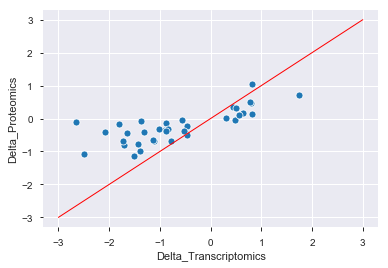

In [14]:
scatter_plot = sns.scatterplot(data=delta_proteomic_transcriptomic_df, x='Delta_Transcriptomics', y='Delta_Proteomics')
plt.plot([-3, 3], [-3, 3], linewidth=1, color='red')
